In [29]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Function to read the data
def dataReader(path_names):
    data_n = pd.DataFrame()
    for path in path_names:
        low_data = pd.read_csv(path, header=None)
        data_n = pd.concat([data_n, low_data], ignore_index=True)
    return data_n

def downSampler(data, a, b):
    """
    data = data
    a = start index
    b = sampling rate
    """
    data_decreased = []
    x = b
    for i in range(int(len(data) / x)):
        segment = data.iloc[a:b, :].sum() / x
        data_decreased.append(segment)
        a += x
        b += x
    return pd.DataFrame(data_decreased)

# Define the database path
database_path = '/home/ecappiell/datasets/full'  # Change this to the correct path

# Dictionary to store directories with their corresponding descriptive names
directory_info = {
    'normal': glob.glob(database_path + '/normal/*.csv'),
    'imbalance_6g': glob.glob(database_path + '/imbalance/6g/*.csv'),
    'imbalance_10g': glob.glob(database_path + '/imbalance/10g/*.csv'),
    'imbalance_15g': glob.glob(database_path + '/imbalance/15g/*.csv'),
    'imbalance_20g': glob.glob(database_path + '/imbalance/20g/*.csv'),
    'imbalance_25g': glob.glob(database_path + '/imbalance/25g/*.csv'),
    'imbalance_30g': glob.glob(database_path + '/imbalance/30g/*.csv'),
    'horizontal_05': glob.glob(database_path + '/horizontal-misalignment/0.5mm/*.csv'),
    'horizontal_1': glob.glob(database_path + '/horizontal-misalignment/1.0mm/*.csv'),
    'horizontal_15': glob.glob(database_path + '/horizontal-misalignment/1.5mm/*.csv'),
    'horizontal_2': glob.glob(database_path + '/horizontal-misalignment/2.0mm/*.csv'),
    'vertical_05': glob.glob(database_path + '/vertical-misalignment/0.51mm/*.csv'),
    'vertical_063': glob.glob(database_path + '/vertical-misalignment/0.63mm/*.csv'),
    'vertical_127': glob.glob(database_path + '/vertical-misalignment/1.27mm/*.csv'),
    'vertical_140': glob.glob(database_path + '/vertical-misalignment/1.40mm/*.csv'),
    'vertical_178': glob.glob(database_path + '/vertical-misalignment/1.78mm/*.csv'),
    'vertical_19': glob.glob(database_path + '/vertical-misalignment/1.90mm/*.csv'),
    'overhang_ball_0g': glob.glob(database_path + '/overhang/ball_fault/0g/*.csv'),
    'overhang_ball_6g': glob.glob(database_path + '/overhang/ball_fault/6g/*.csv'),
    'overhang_ball_20g': glob.glob(database_path + '/overhang/ball_fault/20g/*.csv'),
    'overhang_ball_35g': glob.glob(database_path + '/overhang/ball_fault/35g/*.csv'),
    'overhang_cage_0g': glob.glob(database_path + '/overhang/cage_fault/0g/*.csv'),
    'overhang_cage_6g': glob.glob(database_path + '/overhang/cage_fault/6g/*.csv'),
    'overhang_cage_20g': glob.glob(database_path + '/overhang/cage_fault/20g/*.csv'),
    'overhang_cage_35g': glob.glob(database_path + '/overhang/cage_fault/35g/*.csv'),
    'overhang_outer_0g': glob.glob(database_path + '/overhang/outer_race/0g/*.csv'),
    'overhang_outer_6g': glob.glob(database_path + '/overhang/outer_race/6g/*.csv'),
    'overhang_outer_20g': glob.glob(database_path + '/overhang/outer_race/20g/*.csv'),
    'overhang_outer_35g': glob.glob(database_path + '/overhang/outer_race/35g/*.csv'),
    'underhang_ball_0g': glob.glob(database_path + '/underhang/ball_fault/0g/*.csv'),
    'underhang_ball_6g': glob.glob(database_path + '/underhang/ball_fault/6g/*.csv'),
    'underhang_ball_20g': glob.glob(database_path + '/underhang/ball_fault/20g/*.csv'),
    'underhang_ball_35g': glob.glob(database_path + '/underhang/ball_fault/35g/*.csv'),
    'underhang_cage_0g': glob.glob(database_path + '/underhang/cage_fault/0g/*.csv'),
    'underhang_cage_6g': glob.glob(database_path + '/underhang/cage_fault/6g/*.csv'),
    'underhang_cage_20g': glob.glob(database_path + '/underhang/cage_fault/20g/*.csv'),
    'underhang_cage_35g': glob.glob(database_path + '/underhang/cage_fault/35g/*.csv'),
    'underhang_outer_0g': glob.glob(database_path + '/underhang/outer_race/0g/*.csv'),
    'underhang_outer_6g': glob.glob(database_path + '/underhang/outer_race/6g/*.csv'),
    'underhang_outer_20g': glob.glob(database_path + '/underhang/outer_race/20g/*.csv'),
    'underhang_outer_35g': glob.glob(database_path + '/underhang/outer_race/35g/*.csv')
}

# Dictionary to store the data frames with their corresponding descriptive names
data_frames = {}

# Iterate through the directory_info dictionary and read the data, then downsample it
for key, dir_csv_files in directory_info.items():
    data_frame = dataReader(dir_csv_files)
    data_frame_downsampled = downSampler(data_frame, 0, 5000)
    data_frames[key] = data_frame_downsampled

# Combine all the data into a single DataFrame with labels
combined_data = pd.DataFrame()
for label, df in data_frames.items():
    df['label'] = label
    combined_data = pd.concat([combined_data, df], ignore_index=True)

# Shuffle the combined data
combined_data = combined_data.sample(frac=1).reset_index(drop=True)

# Separate features and labels
X = combined_data.drop('label', axis=1).values
y = combined_data['label'].values

# Encode the labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [3]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Train an SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict with the SVM model
svm_pred = svm_model.predict(X_test)

In [30]:
# Function to print evaluation metrics
def print_metrics(y_true, y_pred):
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted')}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted')}")

In [31]:
print_metrics(y_test, svm_pred)
cm = confusion_matrix(y_test, svm_pred)

Accuracy: 0.23001049317943337
Precision: 0.2665963466975448
Recall: 0.23001049317943337
F1 Score: 0.22913270781247763


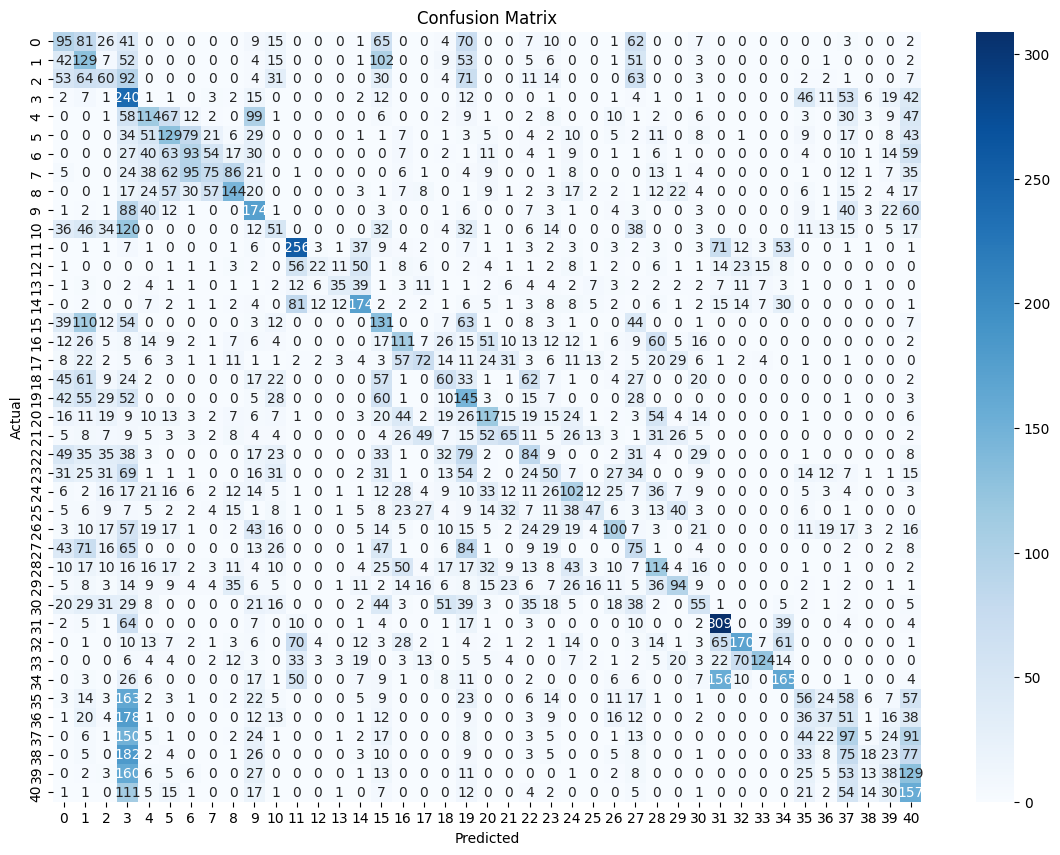

In [35]:
import seaborn as sns
# Plot confusion matrix
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()